In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from printer_anomaly_detection.model.cae import CAE
from pathlib import Path
import tensorflow as tf


project_path = Path('../../../../')

from printer_anomaly_detection.dataset.audio import Split, load_audio_dataset_split


dataset_path = project_path / 'datasets' / 'prints'

dataset = load_audio_dataset_split(dataset_path, 'original', Split.TRAIN, window_size=256, step_size=32)

2023-06-22 17:16:38.687072: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-22 17:16:39.311979: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-06-22 17:16:40.167487: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-06-22 17:16:40.182310: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA n

In [24]:
from printer_anomaly_detection.dataset.audio import get_normalization_stats

In [31]:
mean, var = get_normalization_stats(dataset_path, 'original')
mean, var

(0.03762341, 0.00350116)

: 

In [22]:
normalization = tf.keras.layers.Normalization(axis = None)
normalization.adapt(dataset)

2023-06-22 17:20:08.154841: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


In [23]:
normalization.mean.numpy(), normalization.variance.numpy()

(array([[0.03762341]], dtype=float32), array([[0.00350116]], dtype=float32))

In [4]:
dataset.take(100)

<_TakeDataset element_spec=TensorSpec(shape=(256, 256), dtype=tf.float32, name=None)>

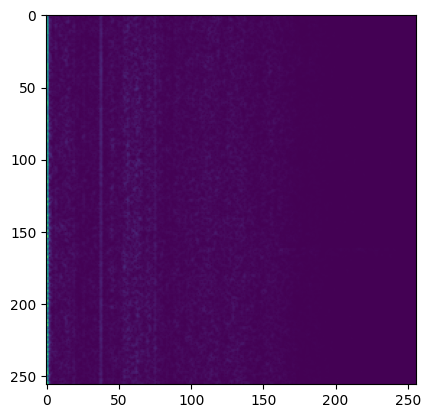

In [43]:
import matplotlib.pyplot as plt

plt.imshow(images[90])

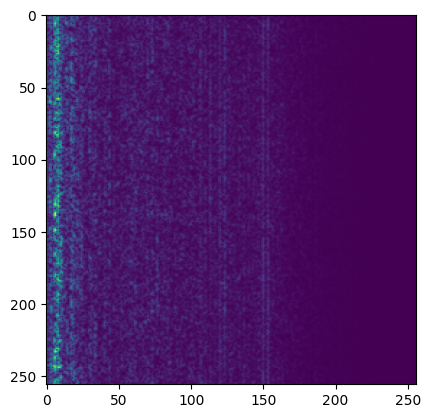

In [51]:
import matplotlib.pyplot as plt

plt.imshow(images[85])

In [70]:
import datetime

datetime.datetime.now().isoformat(timespec='seconds')

'2023-06-21T18:53:56'

: 